In [ ]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
import sys
sacreddnn_dir = "/Data/pittorino/sacreddnn/"
sys.path.insert(0, sacreddnn_dir) 
from src.models.mlp import MLP, MLP_images
from src.models.lenet import LeNet, LeNet_images


/home/pittorino/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dset = "mnist"
model = MLP(784, [1024, 1024, 1024], 10, bias=False)
model.load_state_dict(torch.load(f"results/mlp_{dset}/1/model_final.pt"))
print(model)
model2 = MLP_images(model)
print(model2)


MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=False)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=False)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=False)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=10, bias=False)
  )
)
MLP_images(
  (new_layers): Sequential(
    (0): MultiplyLayer()
    (1): Sigmoid()
  )
  (pretrained): MLP(
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=1024, bias=False)
      (1): ReLU()
      (2): Linear(in_features=1024, out_features=1024, bias=False)
      (3): ReLU()
      (4): Linear(in_features=1024, out_features=1024, bias=False)
      (5): ReLU()
      (6): Linear(in_features=1024, out_features=10, bias=False)
    )
  )
)


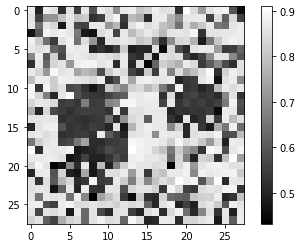

In [6]:
model2.load_state_dict(torch.load(f"results/mlp_{dset}/11/model_final.pt"))
#act = torch.matmul(model2.new_layers[0].weight.detach(), torch.ones(784))
act = model2.new_layers[0].weight.detach()
plt.imshow(torch.sigmoid(act.view(28,28)), cmap="gray")
plt.colorbar()

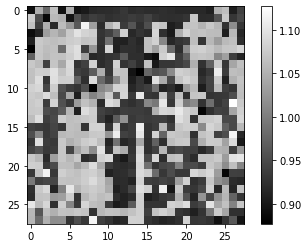

In [9]:
model2.load_state_dict(torch.load("results/mlp_fashion/2/model_final.pt"))
#act = torch.matmul(model2.new_layers[0].weight.detach(), torch.ones(784))
act = model2.new_layers[0].weight.detach()
plt.imshow(act.view(28,28), cmap="gray")
plt.colorbar()

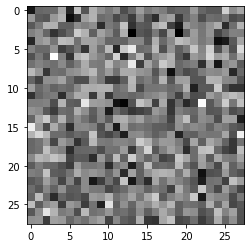

In [10]:
plt.imshow(torch.randn(28,28), cmap="gray")

In [3]:
dset = "cifar10"
model = LeNet(colors=3)
model.load_state_dict(torch.load(f"results/lenet_{dset}/1/model_final.pt"))
print(model)
model2 = LeNet_images(model)
print(model2)

LeNet(
  (layers): Sequential(
    (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1250, out_features=500, bias=True)
    (8): ReLU()
    (9): Linear(in_features=500, out_features=10, bias=True)
  )
)
LeNet_images(
  (new_layers): Sequential(
    (0): MultiplyLayerColors()
    (1): Sigmoid()
  )
  (pretrained): LeNet(
    (layers): Sequential(
      (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mo

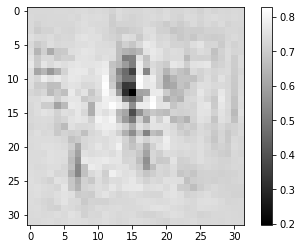

In [ ]:
model2.load_state_dict(torch.load("results/lenet_cifar10/3/model_final.pt"))
#act = torch.matmul(model2.new_layers[0].weight.detach(), torch.ones(784))
act = model2.new_layers[0].weight.detach()
plt.imshow(np.transpose(torch.sigmoid(act), (1,2,0)), cmap="gray")
plt.colorbar()

In [19]:
torch.sigmoid(act)

tensor([[[9.5241e-05, 1.2716e-04, 1.0000e+00,  ..., 5.7645e-26,
          3.1485e-15, 1.5555e-04],
         [6.5362e-09, 1.0000e+00, 2.9051e-04,  ..., 0.0000e+00,
          1.0000e+00, 1.8745e-11],
         [1.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          1.0000e+00, 1.1766e-16],
         ...,
         [0.0000e+00, 9.8028e-01, 1.0000e+00,  ..., 0.0000e+00,
          1.0000e+00, 1.0000e+00],
         [5.1610e-21, 1.0789e-16, 1.0000e+00,  ..., 1.0000e+00,
          9.9999e-01, 1.0000e+00],
         [5.2244e-10, 0.0000e+00, 3.0245e-23,  ..., 1.0000e+00,
          1.0000e+00, 7.6885e-01]]])

In [ ]:
    # GET ACTIVATIONS
    #activation = {}
    #def get_activation(name):
    #    def hook(model, input, output):
    #        activation[name] = output.detach()
    #    return hook
    #model.new_layers.register_forward_hook(get_activation('fc2'))
    #x = torch.ones(1, 28, 28).to(device)
    #output = model(x)
    #print(activation['fc2'])